# Bibliotecas utilizadas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds

# Tratamento dos dados

Dataset obtido [aqui](http://grouplens.org/datasets/movielens/20m).

O arquivo de avaliações original ('ratings.csv') contém mais de 20M de linhas (508MB de espaço) e levaria muito tempo para ser processado.

Para este trabalho, consideramos apenas as primeiras 100 mil linhas do arquivo de avaliações, gerando um novo arquivo 'ratings_small.csv' a partir do comando:

`cat ratings.csv | head -100000 > ratings_small.csv`

Arquivos .csv foram carregados em um repositório online

In [ ]:
movies_csv = "https://raw.githubusercontent.com/yurifernandes96/recommender_system_svd/main/movies.csv"
ratings_small_csv = "https://raw.githubusercontent.com/yurifernandes96/recommender_system_svd/main/ratings_small.csv"

## Identificação dos Filmes

Vamos carregar o arquivo 'movies.csv' em um DataFrame, que vai fazer o papel de um dicionário que mapeia o ID de um filme com o seu título.

In [ ]:
movies = pd.read_table(movies_csv, sep=',',names = ['movieId',"Title","genres"], skiprows=1)

In [ ]:
movies

,movieId,Title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## Geração da matriz de Avaliações

Vamos usar um leitor de texto do numpy para armazenar cada coluna do arquivo de avaliações ('ratings_small.csv') nas variáveis u, m, r, e junk, e então criar uma **matriz esparsa** baseada em coordenadas.

In [ ]:
u, m, r, junk = np.loadtxt(ratings_small_csv, delimiter=',', skiprows=1).T
m = m.astype(int)
u = u.astype(int)
mat = coo_matrix((r, (u-1, m-1)), shape=(u.max(), m.max()))

In [ ]:
print(mat.shape)
print(mat)

(702, 128594)
  (0, 1)	3.5
  (0, 28)	3.5
  (0, 31)	3.5
  (0, 46)	3.5
  (0, 49)	3.5
  (0, 111)	3.5
  (0, 150)	4.0
  (0, 222)	4.0
  (0, 252)	4.0
  (0, 259)	4.0
  (0, 292)	4.0
  (0, 295)	4.0
  (0, 317)	4.0
  (0, 336)	3.5
  (0, 366)	3.5
  (0, 540)	4.0
  (0, 588)	3.5
  (0, 592)	3.5
  (0, 652)	3.0
  (0, 918)	3.5
  (0, 923)	3.5
  (0, 1008)	3.5
  (0, 1035)	4.0
  (0, 1078)	4.0
  (0, 1079)	3.5
  :	:
  (701, 1275)	3.0
  (701, 1277)	3.5
  (701, 1281)	3.0
  (701, 1284)	4.0
  (701, 1286)	3.0
  (701, 1287)	3.5
  (701, 1290)	4.5
  (701, 1292)	4.5
  (701, 1295)	3.0
  (701, 1298)	4.0
  (701, 1301)	3.0
  (701, 1303)	3.0
  (701, 1306)	4.0
  (701, 1319)	2.0
  (701, 1332)	4.5
  (701, 1338)	3.0
  (701, 1342)	3.0
  (701, 1343)	3.0
  (701, 1344)	3.5
  (701, 1356)	4.0
  (701, 1369)	2.5
  (701, 1372)	3.0
  (701, 1373)	2.5
  (701, 1376)	1.5
  (701, 1377)	1.5


# Aplicação do SVD

Usamos o método svds, da biblioteca scipy, para decompor a **matriz esparsa** 'mat' nas matrizes U, SIGMA e VT.

In [ ]:
U, SIGMA, VT = svds(mat, k=700)

## Análise dos autovalores

In [ ]:
SIGMA = np.flip(SIGMA) # o método svds retorna os valores singulares em ordem crescente
SIGMA

array([507.64183773, 214.74740517, 205.41904406, 179.12265847,
       152.63184276, 145.52193019, 129.94736976, 126.76570944,
       123.70435325, 113.59438678, 107.88576124, 105.69268361,
       102.33267603,  99.26890182,  97.53978882,  96.07995648,
        94.08836609,  92.52203258,  91.2062904 ,  90.09531108,
        88.11311711,  87.22332207,  84.82648374,  83.53792363,
        81.99844883,  81.03211004,  80.42215928,  79.76005684,
        78.19597612,  77.97086987,  77.06574603,  76.33077081,
        75.88320778,  74.6532447 ,  74.47028234,  73.83734475,
        73.05701531,  72.15281906,  71.79007815,  71.52979458,
        71.06125583,  70.49227274,  69.73783243,  69.40877987,
        68.68057691,  68.17243751,  68.11309009,  67.28084809,
        66.70305441,  66.48831363,  66.31812615,  65.8347585 ,
        65.3150234 ,  65.07727281,  64.54078591,  64.27958832,
        64.05959344,  63.79222134,  63.36977309,  63.03909489,
        62.43047768,  62.25049387,  62.02350879,  61.74

In [ ]:
# Geração dos autovalores a partir dos valores singulares
eigenvals = [s**2 for s in SIGMA]

Variância Explicada pelos 20 primeiros valores singulares (porcentagem): 
[19.1843  3.4331  3.1413  2.3885  1.7343  1.5765  1.2571  1.1963  1.1392
  0.9606  0.8665  0.8316  0.7796  0.7336  0.7083  0.6872  0.659   0.6373
  0.6193  0.6043]



<Axes: title={'center': 'Variância explicada pelos valores singulares'}, xlabel='Vetor Singular', ylabel='Variância explicada (%)'>

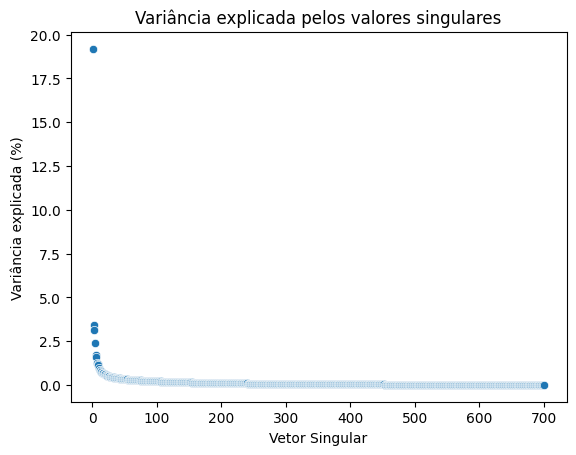

In [ ]:
# Gráfico que mostra a quantidade de informação contida nos 20 primeiros autovalores
# Mesmo código utilizado pela professora na Aula 24
var_explained = np.round(SIGMA**2/np.sum(SIGMA**2), decimals = 6)
print(f'Variância Explicada pelos 20 primeiros valores singulares (porcentagem): \n{100*var_explained[0:20]}\n')

plt.title('Variância explicada pelos valores singulares')
plt.xlabel('Vetor Singular')
plt.ylabel('Variância explicada (%)')
sb.scatterplot(x=list(range(1,var_explained.shape[0]+1)),y=100*var_explained,markers="o")

In [ ]:
print(f'Porcentagem do 1o autovalor: {100*eigenvals[0]/sum(eigenvals)}')

Porcentagem do 1o autovalor: 19.18431277382265


In [ ]:
print(f'Porcentagem dos 100 primeiros autovalores: {100*sum(eigenvals[:100])/sum(eigenvals)}')

Porcentagem dos 100 primeiros autovalores: 68.66617221014212


In [ ]:
print(f'Porcentagem dos 200 primeiros autovalores: {100*sum(eigenvals[:200])/sum(eigenvals)}')

Porcentagem dos 200 primeiros autovalores: 83.30277584420071


In [ ]:
print(f'Porcentagem dos 300 primeiros autovalores: {100*sum(eigenvals[:300])/sum(eigenvals)}')

Porcentagem dos 300 primeiros autovalores: 91.12222153911402


Do total de 702 autovalores, os 300 maiores (menos da metade) já contêm 91% da informação, o que possibilita o uso de truncamento.

# Algoritmo de Recomendação

O algoritmo de recomendação utilizado é baseado no produto interno. Quanto maior o produto interno, maior a similaridade entre dois filmes.

Dado um filme 'user_movieID' que o usuário gosta, o algoritmo retorma uma lista com os filmes que possuem mais similaridade com o filme fornecido.

In [ ]:
# Função que recomenda, por padrão, 10 filmes similares a um filme fornecido
def recommend_similar_movies(user_movieID, VT, tot_requests=10):
    # Os arquivos movies.csv e rating_small.csv com os datasets são 1-indexados (o primeiro filme é o filme de ID 1)
    # Os nossos dataframes U, SIGMA e VT são 0-indexados (o primeiro filme é o filme de ID 0)
    user_movieID -= 1

    recs = [] # lista de pares (idFilme, similaridade)

    for movieID in range(len(VT[0])):
        if movieID != user_movieID: # nao recomendar o mesmo filme que o usuario ja assistiu
            recs.append([movieID+1,np.dot(VT[:,user_movieID],VT[:,movieID])])  #insere o par (filme_atual, similaridade entre filme_atual e filme do usuario)
    final_rec = [(i[0],i[1]) for i in sorted(recs,key=lambda x: x[1],reverse=True)] # ordenar a lista de recomendados de acordo com as similaridades (da maior para a menor)
    return final_rec[:tot_requests] # retornar os 'tot_requests' filmes com maior similaridade

A partir da análise dos autovalores, decidimos aplicar a SVD truncada com k = 300.

In [ ]:
# Com k = 300, temos 91% da informação
U, SIGMA, VT = svds(mat, k=300)

In [ ]:
# Consulta no dicionário qual o ID de um filme de acordo com seu título
movies[movies.Title == "Toy Story (1995)"]

,movieId,Title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# Imprime os 10 filmes mais similares com o filme pesquisado
MOVIE_ID = 1
for item in recommend_similar_movies(MOVIE_ID,VT,tot_requests=10):
    print(item)
    print(movies[movies['movieId'] == int(item[0])].Title,'\n')

(3114, 0.07188579614193323)
3027    Toy Story 2 (1999)
Name: Title, dtype: object 

(141, 0.04940638533235653)
139    Birdcage, The (1996)
Name: Title, dtype: object 

(4306, 0.046725954394975316)
4211    Shrek (2001)
Name: Title, dtype: object 

(52, 0.04572245166702277)
51    Mighty Aphrodite (1995)
Name: Title, dtype: object 

(661, 0.04097209985414245)
653    James and the Giant Peach (1996)
Name: Title, dtype: object 

(595, 0.04079892581441221)
589    Beauty and the Beast (1991)
Name: Title, dtype: object 

(802, 0.04033225452718689)
789    Phenomenon (1996)
Name: Title, dtype: object 

(4886, 0.0383701977464551)
4790    Monsters, Inc. (2001)
Name: Title, dtype: object 

(1073, 0.037091443871388366)
1052    Willy Wonka & the Chocolate Factory (1971)
Name: Title, dtype: object 

(380, 0.037088997890286475)
376    True Lies (1994)
Name: Title, dtype: object 



# Referências

MILLER, Z. W. **Recommendation Engines for Dummies.** Disponível em: <http://zwmiller.com/projects/simple_recommender.html>. Acesso em: 27 nov. 2023.

TAE, J. **Recommendarion Algorithm with SVD.** Disponível em: <https://jaketae.github.io/study/svd/>. Acesso em: 27 nov. 2023